# Supervised ML Model
##### Predict the result of student based on the no. of study hours

**IMPORT NECESSARY LIBRARIES**

AUTHOR: Tejas Jaiswal, IIT ISM Dhanbad (CSE)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**READING THE DATA**

In [2]:
#fetch data from remote location using read_csv
data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**EXTRACTING THE REQUIRED IMFORMATION FROM THE DATA**

Given Dataset : HOURS vs SCORES <br>
Required Data format : Separate arrays for feature values and the respective outputs. 

In [3]:
x=data["Hours"]
y=data["Scores"]
x=x.to_numpy() #CONVERTING THE SERIES OBJECT INTO A NUMPY ARRAY 
x=x.reshape((-1,1)) #RESHAPING THE NUMPY ARRAY TO BE OF THE FORM(N,1) INSTEAD OF THE FORM(N,)
y=y.to_numpy() #CONVERTING THE SERIES OBJECT INTO A NUMPY ARRAY
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)
print(x.shape)
print(y.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(25, 1)
(25,)
(20, 1) (20,)
(5, 1) (5,)


**PLOTTING THE GIVEN DATASET**
<br>

"A picture is worth more than a thousand words"

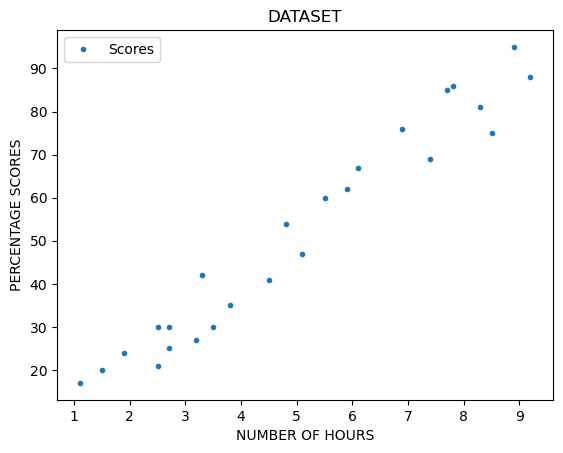

In [4]:
data.plot(x="Hours",y="Scores",style='.')
plt.title("DATASET")
plt.ylabel("PERCENTAGE SCORES")
plt.xlabel("NUMBER OF HOURS")
plt.show()

### THE MODEL

Using the sklearn built-in LINEAR REGRESSION MODEL<br>
(Linear Regression can also be implemented by using a brute-force in each step)

In [5]:
model=LinearRegression()
model.fit(x_train,y_train) #FITING THE MODEL ONTO THE TRAINING DATASET

LinearRegression()


Since we have the Linear Regression Model trained on a single feature (i.e., No. of Hours) ,we will get only a single coefficient and a single intercept

In [6]:
coef=model.coef_
intercept=model.intercept_
print("COEFFICIENT:",coef)
print("INTERCEPT:",intercept)

COEFFICIENT: [10.15628688]
INTERCEPT: 0.4935596992278448


### PLOT THE RESULT

After fitting the model with dataset , Linear Regression line can be created using Y=MX+C.<br>
Plotting the line along with given actual data points...<br>
THE DOTS REPRESENT THE ACTUAL DATA POINTS, WHEREAS THE CORRESPONDING Y INTERCEPT OF A GIVEN X REPRESENT THE PREDICTED VALUE.

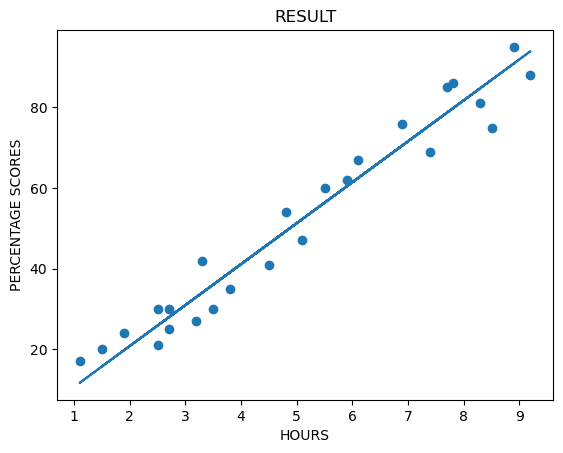

In [7]:
line = model.coef_*x+model.intercept_
plt.scatter(x,y)
plt.plot(x, line)
plt.title("RESULT")
plt.xlabel("HOURS")
plt.ylabel("PERCENTAGE SCORES")
plt.show()

PRINTING THE PREDICTIONS MADE ON THE TEST DATASET ALONG WITH THE ORIGINAL VALUES GIVEN FOR THEM

In [8]:
y_pred=model.predict(x_test)
print("PREDICTED VALUES:",y_pred)
print("GIVEN VALUES:",y_test)

PREDICTED VALUES: [15.72799002 86.82199818 34.0093064  62.44690967 27.91553428]
GIVEN VALUES: [20 75 42 67 25]


### PREDICTING FOR THE GIVEN VALUE

AS ASKED IN THE TASK, I HAVE PREDICTED THE SCORES FOR THE VALUE OF 9.25 HOURS :

In [9]:
test_val=9.25
test=np.array([test_val]).reshape((-1,1))
print(test.shape)
print("ANSWER:",model.predict(test))

(1, 1)
ANSWER: [94.43921334]


**MEAN ABSOLUTE ERROR**

( FOR THE ENTIRE DATA )

In [10]:
pred=model.predict(x)
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(y,pred))

MEAN ABSOLUTE ERROR: 5.0913861820143635


**R2 SCORE**

( FOR THE ENTIRE DATA )

In [28]:
metrics.r2_score(y,pred)

0.9514933750993224